In [3]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import sem
from itertools import combinations
def hex_2_rgb(hex_color): # Orange color
    rgb_color = tuple(int(hex_color[i:i+2], 16) / 255.0 for i in (1, 3, 5))
    return rgb_color

def pickle_this(thing_to_pickle, file_name):
    """
    Pickles things
    Args (2):   
        thing_to_pickle: anything you want to pickle
        file_name: str, filename that ends with .pkl 
    Returns:
        none
    """
    with open(file_name,'wb') as file:
        pickle.dump(thing_to_pickle, file)

def unpickle_this(pickle_file):
    """
    Unpickles things
    Args (1):   
        file_name: str, pickle filename that already exists and ends with .pkl
    Returns:
        pickled item
    """
    with open(pickle_file, 'rb') as file:
        return(pickle.load(file))

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [4]:
behavior_dicts = unpickle_this('behavior_dicts.pkl')


In [5]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
for behavior_dict in behavior_dicts:
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if j in event_info.keys():
            dict_event = event_info[j]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[j] =  dict_event
        else:
            event_info[j] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs) # out of 524, after fixing 83 for 5 
# out of 465

0
1257


In [6]:
ephy_beh_dict = [item for i, item in enumerate(behavior_dicts) if i != 2]

print(len(ephy_beh_dict))

8


In [7]:
event_info = {}
sniff_itis = []
j = 0
total_sniffs = 0
for behavior_dict in ephy_beh_dict:
    event_dict_keys = behavior_dict.keys()
    for event, events in behavior_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for i in range(len(events)):
            sniff_length_temp = events[i][1] - events[i][0]
            sniff_length = sniff_length + sniff_length_temp
            total_sniffs = total_sniffs + 1
            try:
                sniff_iti = events[i+1][0] - events[i][1]
                sniff_itis.append(sniff_iti)
            except IndexError:
                pass
        total_sniff_time = sniff_length/1000
        try:
            avg_event = sniff_length/no_events/1000
        except ZeroDivisionError:
            avg_event = 0
        if j in event_info.keys():
            dict_event = event_info[j]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[j] =  dict_event
        else:
            event_info[j] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}
    j += 1
sniff_itis = np.array(sniff_itis)/1000
sniff_itis 
overlapping_sniffs = 0 
for i in range(len(sniff_itis)):
    if sniff_itis[i] < 1:
        overlapping_sniffs = overlapping_sniffs + 1
print(overlapping_sniffs) # was 54 with old thresholding for less than 2, 142 for 5
print(total_sniffs) # out of 524, after fixing 83 for 5 
# out of 465

0
1089


In [8]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_dict_keys
event_overview_averages = event_overview.groupby('level_1').mean()
event_overview_averages

,level_0,cup 1,cup 2,cup 3,cup 4,acquisition,cagemate,empty,novel,familiar,baseline
level_1,,,,,,,,,,,
avg event,3.5,3.754869,3.276511,4.793015,3.994991,6.922535,7.068518,3.201454,4.911707,4.108741,4.00587
no_events,3.5,12.125000,8.375000,9.625000,12.375000,13.750000,15.750000,6.000000,11.375000,8.250000,38.50000
total time,3.5,59.144250,53.091500,60.198000,58.625750,90.488375,109.934375,19.864000,46.722375,37.693625,155.93675


In [9]:
event_overview_averages = event_overview_averages[['cagemate', 'novel', 'familiar']]
event_overview_averages.mean(axis = 1)

level_1
avg event      5.362989
no_events     11.791667
total time    64.783458
dtype: float64

In [10]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_cup_time_averages = {}
for event in event_dict_keys:
    if 'cup' in event:
        avg_event = event_total_time[event].mean()
        event_cup_time_averages[event] = avg_event
event_cup_time_averages

{'cup 1': 59.14425000000003,
 'cup 2': 53.091499999999996,
 'cup 3': 60.19800000000014,
 'cup 4': 58.62575}

In [11]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_agent_time_averages = {}
avg_events = []
sem_events = []
for event in event_dict_keys:
    if 'cup' not in event:
        avg_event = event_total_time[event].mean()
        sem_event = sem(event_total_time[event])
        event_agent_time_averages[event] = avg_event
        avg_events.append(avg_event)
        sem_events.append(sem_event)
avg_events = np.array(avg_events)
sem_events = np.array(sem_events)
event_agent_time_averages

{'acquisition': 90.48837499999999,
 'cagemate': 109.93437500000017,
 'empty': 19.864000000000086,
 'novel': 46.72237499999997,
 'familiar': 37.69362499999994,
 'baseline': 155.93675000000002}

In [12]:
avg_events = avg_events[np.array([3,4,1])]

sem_events = sem_events[np.array([3,4,1])]

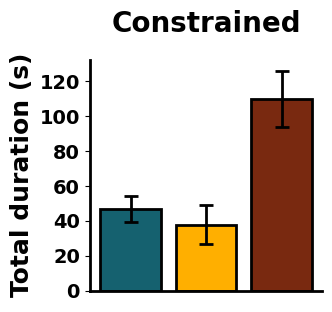

In [20]:
plt.rcParams['font.weight'] = 'bold'  # Set font weight to bold (not bold)
plt.rcParams['axes.titleweight'] = 'bold'  # Set axis title font weight to bold
plt.rcParams['axes.labelweight'] = 'bold'  # Set axis label font weight to bold

color_id_dict = {'novel': hex_2_rgb('#15616F'),  
                'short-term familiar\n(exposure 2)': (1.0, 0.6862745098039216, 0.0),
                'long-term familiar': hex_2_rgb('#792910')
                }
hatches = ['','','']  
plt.figure(figsize= (3,3))           
plt.bar(color_id_dict.keys(), avg_events, yerr = sem_events,
            color = color_id_dict.values(), hatch = hatches,
            edgecolor = ['black', 'black', 'black'], linewidth = 2,
            capsize = 5, error_kw={'elinewidth': 2, 'capthick': 2})
plt.xticks([],rotation=45)
plt.ylabel('Total duration (s)', fontsize = 18)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
hatches = ['//','','','', '']
plt.gca().spines['bottom'].set_linewidth(2)  # X-axis
plt.gca().spines['left'].set_linewidth(2) 
plt.title('Constrained', fontsize = 20, pad = 20)
plt.savefig('phase3_behavior.png', format='png', dpi=600, transparent = True, bbox_inches='tight')

In [ ]:
from scipy.stats import ttest_rel
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
event_total_time= event_total_time[['familiar', 'cagemate', 'novel']]
results = {}
p_values = pd.DataFrame(index=event_total_time.columns, columns=event_total_time.columns)
p_value_list = []
for pair in combinations(event_total_time.columns, 2):
    t_stat, p_value = ttest_rel(event_total_time[pair[0]],event_total_time[pair[1]])
    results[pair] = [t_stat, p_value]
    p_value_list.append(p_value)
            
results


{('familiar', 'cagemate'): [-4.218658404598381, 0.003943159233508464],
 ('familiar', 'novel'): [-1.1697445302390637, 0.2803859123509654],
 ('cagemate', 'novel'): [3.2341555193563387, 0.014368822748599342]}

In [ ]:
adjusted_p_values = multipletests(p_value_list, method='holm')
adjusted_p_values

(array([ True, False,  True]),
 array([0.01182948, 0.28038591, 0.02873765]),
 0.016952427508441503,
 0.016666666666666666)